
\begin{equation*}
\textbf{\textcolor{red}{X}} = 
\begin{bmatrix}
1 & x_{1}(1) & x_{2}(1) & \dots & x_{p}(1) \\
1 & x_{1}(2) & x_{2}(2) & \dots & x_{p}(2) \\
\vdots &\vdots & \vdots & \dots & \vdots \\
1 & x_{1}(n) & x_{2}(n) & \dots & x_{p}(n) \\

\end{bmatrix}
\end{equation*}

\begin{equation*}
\textbf{\textcolor{red}{Y}} = 
\begin{bmatrix}
y(1) \\
y(2) \\
\vdots \\
y(n) \\
\end{bmatrix}
\end{equation*}

We're looking for such $\beta$ that the error function, $Error$, is minimized. Error function is given by:
\begin{equation*}
Error = (X \beta - Y)^{T}(X \beta -Y)
\end{equation*}

It can be shown that $\beta = (X^{T}X)^{-1}X^{T}Y$ minimizes the function.




### Data generating.

In [103]:
import numpy as np

#Generate some data
#Assume you have p predictors and n observations.
p = 4
n = 300
np.random.seed(1)
Predictors = [ np.random.normal(loc = np.random.uniform(-3, 3,), scale = np.random.uniform(0.001, 3, 1), size =n) for _ in range(p)]
Predictors.insert(0,[1]*n)

Predictors = np.column_stack(Predictors)

#Define the parameters of the regression
Parameters = np.random.uniform(-3, 3, size = p+1)
Parameters

tar = (Predictors * Parameters).sum(axis=1)

### Numerical minimizing.

,Liczba powtórzeń,Pomiar
100,100,28.596625
101,101,28.561825
102,102,28.527056
103,103,28.492316
104,104,28.457606
...,...,...
495,495,17.039819
496,496,17.014803
497,497,16.989465
498,498,16.964049


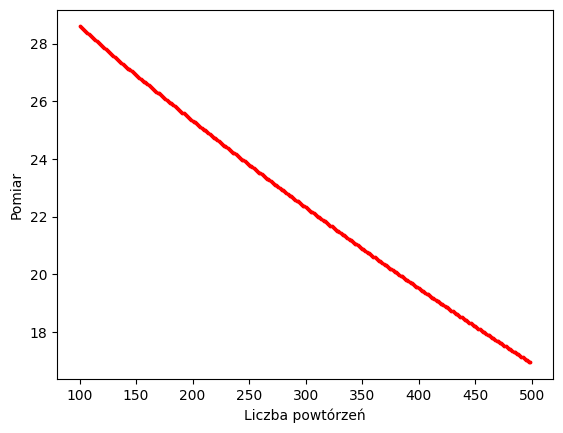

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

def MSE(X, y, params):
    return np.sum(((X*params).sum(axis=1) - y)**2)

    


def ComputeGradient(args, dx:float = 0.00001):
    Gradient = []

    
    substractor = MSE(Predictors, tar, args)

    for i in range(len(args)):
        args_copy = args.copy()
        args_copy[i] += dx

        Gradient.append((MSE(Predictors, tar, args_copy) - substractor)/dx)

    return np.array(Gradient)


        

def UpdateParameters(n:int, lr:float, eps:float, B1:float, B2:float):
    Params_hat = np.ones(shape =[p+1], dtype = np.float64)


    #Define the first moment of the gradient.
    m = np.zeros(shape = [p+1], dtype = np.float32)
    #Define the second moment of the gradient.
    v = np.zeros(shape = [p+1], dtype = np.float32)


    for _ in range(n):
        Gradient = ComputeGradient(Params_hat)

        m = (B1*m + (1-B1) * Gradient)/(1-B1)
        v = (B2*v + (1-B2) * Gradient**2)/(1-B2)

        
        Params_hat = Params_hat - lr * m/(np.sqrt(v)+eps)

    return Params_hat




DanePomiarowe = pd.DataFrame(columns = ['Liczba powtórzeń','Pomiar'])

Params_hat = UpdateParameters(n=5000, 
                               lr = 0.001, eps =0.001, 
                               B1 = 0.4, B2 = 0.4)


for i in range(100,500):
    Params_hat = UpdateParameters(n=i, 
                              lr = 0.001, eps =0.001, 
                              B1 = 0.4, B2 = 0.4)



    DanePomiarowe.loc[i,] = [i,((Params_hat-Parameters)**2).sum()]


DanePomiarowe.plot.scatter(x = "Liczba powtórzeń",
                            y = "Pomiar", s =3, color = "red")

DanePomiarowe





### Analytical solution.

In [105]:


Parameters_anal = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(Predictors),Predictors)),np.transpose(Predictors)), tar)


print(Parameters_anal)

























[-0.19170267  0.77911813 -2.05180899 -2.91130748 -1.4069279 ]
